## Random Numbers

- Plotting Distributions
- Guessing
- Drawing Random Samples
- Density Estimation
- Dice Roll
- Random Card Draw
- Bayes Rule

Import Required Packages

In [33]:
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

Create an array filled with a linear sequence Starting at 0, ending at 20, stepping by 2 (this is similar to the built-in range() function)

In [2]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

Create an array of five values evenly spaced between 0 and 1

In [3]:
np.linspace(0, 1, 5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

Create a 3x3 array of uniformly distributed random values between 0 and 1

In [6]:
np.random.random((5, 5))

array([[ 0.56804456,  0.92559664,  0.07103606,  0.0871293 ,  0.0202184 ],
       [ 0.83261985,  0.77815675,  0.87001215,  0.97861834,  0.79915856],
       [ 0.46147936,  0.78052918,  0.11827443,  0.63992102,  0.14335329],
       [ 0.94466892,  0.52184832,  0.41466194,  0.26455561,  0.77423369],
       [ 0.45615033,  0.56843395,  0.0187898 ,  0.6176355 ,  0.61209572]])

Create a 3x3 array of normally distributed random values with mean 0 and standard deviation 1

In [22]:
np.random.normal(0, 1, (3, 3))

array([[ 1.49072192,  0.19549934, -0.47160433],
       [ 1.81235465, -2.29413748,  0.65120935],
       [-1.13049645, -0.77734666,  1.11593845]])

Create a 3x3 array of random integers in the interval [0, 10)

In [6]:
np.random.randint(0, 10, (3, 3))

array([[0, 1, 9],
       [9, 0, 4],
       [7, 3, 2]])

### Histograms
A histogram is a graph of a Probability Mass Function
 - On the x-axis are the discrete random variables; 
 - On the y-axis are the probabilities for each discrete variable. 
 - The area under a graph of a probability mass function is 1 (i.e. the probability of all events, when added together, is 100%)

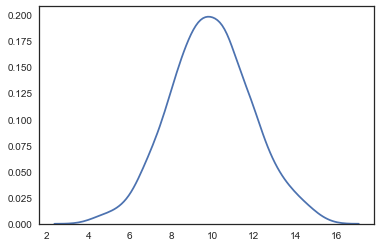

In [34]:
#Parameters
center = 10
std = 2
num_points = 1000
bins = 120

#Create a random normal distribution,
normal_points = np.random.normal(loc=center,scale=std, size=num_points)

#plt.figure()
#plt.hist(normal_points,bins=bins,normed=True)
plt.figure()
#sns.distplot(normal_points, bins=bins)
sns.kdeplot(normal_points)

The **Central Limit Theorem** states that if you have a collection of random variables and sum them up, then the larger the collection, the closer the sum will be to a *normal distribution* (also called a *Gaussian distribution* or a *bell-shaped curve*).

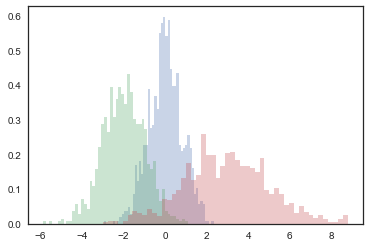

In [30]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist(x1, histtype='stepfilled', alpha=0.3, normed=True, bins=50)
plt.hist(x2, histtype='stepfilled', alpha=0.3, normed=True, bins=50)
plt.hist(x3, histtype='stepfilled', alpha=0.3, normed=True, bins=50);


This combination of histtype='stepfilled', along with some transparency alpha is useful when comparing histograms of several distributions

# Density Estimation

Density estimation walks the line between unsupervised learning, feature engineering, and data modeling. 

It's actually a fairly simple concept, and most people are already familiar with one common density estimation technique: the histogram.

A major problem with histograms, however, is that the choice of binning can have a disproportionate effect on the resulting visualization.

Some other popular and useful density estimation techniques are mixture models such as Gaussian Mixtures (sklearn.mixture.GaussianMixture), and neighbor-based approaches such as the kernel density estimate (sklearn.neighbors.KernelDensity).

<img src='http://scikit-learn.org/stable/_images/sphx_glr_plot_kde_1d_0021.png'>

/Users/brentskoumal/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


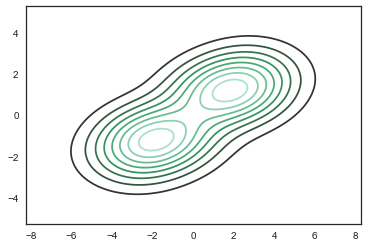

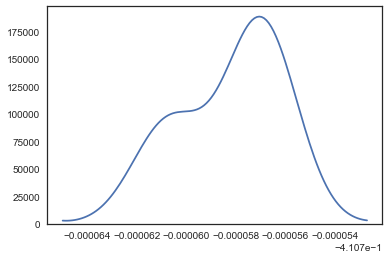

In [35]:
from sklearn.neighbors.kde import KernelDensity
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.figure()
sns.kdeplot(X)
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
plt.figure()
sns.kdeplot(kde.score_samples(X))

In [42]:
# generate a uniform random sample 
np.random.choice(5, 3)
#This is equivalent to np.random.randint(0,5,3)

array([4, 1, 2])

In [11]:
# Generate a non-uniform random sample from np.arange(5) of size 3:
np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])

array([2, 3, 3])

In [12]:
# Generate a uniform random sample from np.arange(5) of size 3 without replacement:
np.random.choice(5, 3, replace=False)
#This is equivalent to np.random.permutation(np.arange(5))[:3]

array([2, 3, 1])

In [13]:
# Generate a non-uniform random sample from np.arange(5) of size 3 without replacement:
np.random.choice(5, 3, replace=False, p=[0.1, 0, 0.3, 0.6, 0])

array([3, 2, 0])

In [58]:
# Any of the above can be repeated with an arbitrary array-like instead of just integers. 
# For instance:
random_pick = ['mike', 'amir', 'brian', 'brent']
np.random.choice(random_pick, 5, p=[0.5, 0.1, 0.1, 0.3])

array(['brian', 'mike', 'mike', 'brent', 'mike'], 
      dtype='<U5')

In [44]:
# Modify a sequence in-place by shuffling its contents.
arr = np.arange(30)
#np.random.shuffle(arr)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [45]:
# This also works for matrices
two_d = np.arange(25).reshape((5, 5))
np.random.shuffle(two_d)
two_d

array([[ 0,  1,  2,  3,  4],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [17]:
# Randomly permute a sequence, or return a permuted range.
np.random.permutation(10)
# if you don't give an argument, it treats it as arange

array([3, 1, 7, 8, 9, 4, 2, 0, 6, 5])

### The probability density for the binomial distribution is

<img src='https://docs.scipy.org/doc/numpy/_images/math/88748cdbc52cb4bbe3e4f58274c7ae9f731cd20a.svg'>

where n is the number of trials, p is the probability of success, and N is the number of successes

In [59]:
# Draw samples from the distribution
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 10)

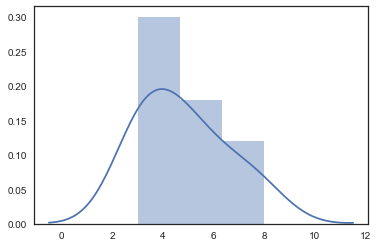

In [60]:
sns.distplot(s)

(array([ 1.2,  0. ,  0. ,  0. ,  0.8,  0. ,  0. ,  0. ,  0.8,  0. ,  0. ,
         0. ,  0.4,  0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0.4]),
 array([ 3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,
         5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,  7.25,
         7.5 ,  7.75,  8.  ]),
 <a list of 20 Patch objects>)

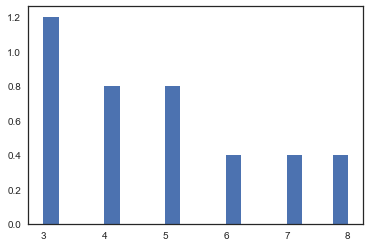

In [61]:
plt.hist(s,bins=20,normed=True)

#### A real world example. 
 - A company drills 9 wild-cat oil exploration wells, each with an estimated probability of success of 0.1. All nine wells fail. What is the probability of that happening?

 - Let’s do 20,000 trials of the model, and count the number that generate zero positive results.

In [21]:
sum(np.random.binomial(9, 0.1, 20000) == 0)/20000.

0.38605

# A few more common distributions

### The probability density for the exponential distribution is

<img src='https://docs.scipy.org/doc/numpy/_images/math/8840abeb74cea46293b944971a4cac7f0db924f6.svg'>

 - for x > 0 and 0 elsewhere. $\beta$ is the scale parameter, which is the inverse of the rate parameter $\lambda$ = 1/$\beta$. The rate parameter is an alternative, widely used parameterization of the exponential distribution

### The probability density for the exponential distribution is

<img src='https://docs.scipy.org/doc/numpy/_images/math/cef384dd71ca251a5ee8004f98a99bf809657fc8.svg'>

where $\mu$ = location and $s$ = scale.

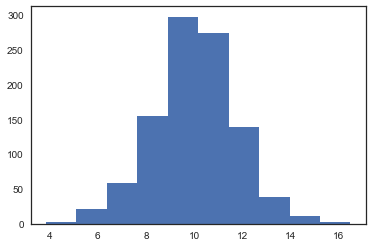

In [22]:
# Draw samples from the exponential distribution

loc, scale = 10, 1
s = np.random.logistic(loc, scale, 1000)
count, bins, ignored = plt.hist(s, bins=10)

In [23]:
# also worth noting, if you set count, bins, ignored when you plot a histogram, 
# you can access the bin positions/cutoffs
bins

array([  3.8439026 ,   5.10906661,   6.37423062,   7.63939464,
         8.90455865,  10.16972266,  11.43488668,  12.70005069,
        13.9652147 ,  15.23037872,  16.49554273])

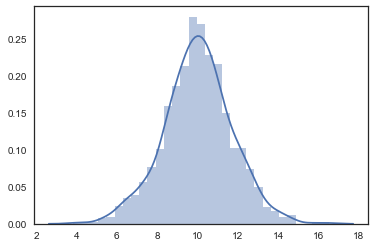

In [24]:
sns.distplot(s)

### The probability density for the uniform distribution is

<img src='https://docs.scipy.org/doc/numpy/_images/math/30892d6b0dfe8db2ebc0248d3bfe4aba4ac65171.svg'>

anywhere within the interval `[a, b)`, and zero elsewhere.

In [62]:
# Draw samples from a uniform distribution

s = np.random.uniform(-1,0,100)
# All values are within the given interval:
np.all(s >= -1)


#np.all(s < 0)

True

Samples are uniformly distributed over the half-open interval `[low, high)` (includes `low`, but excludes `high`). In other words, any value within the given interval is equally likely to be drawn by uniform.

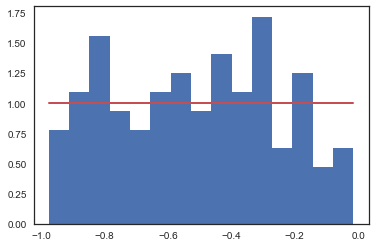

In [26]:
# Display the histogram of the samples, along with the probability density function
count, bins, ignored = plt.hist(s, 15, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')

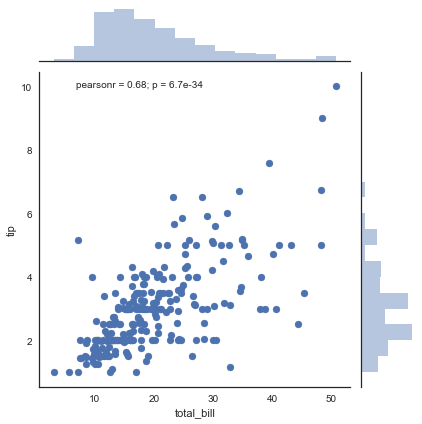

In [27]:
# a helpful plot for visualizing how two variables are distributed/correlated
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips)

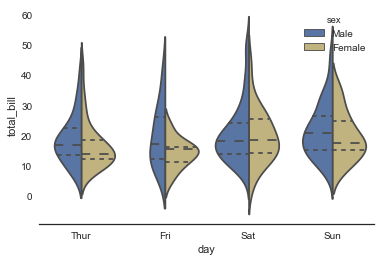

In [28]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

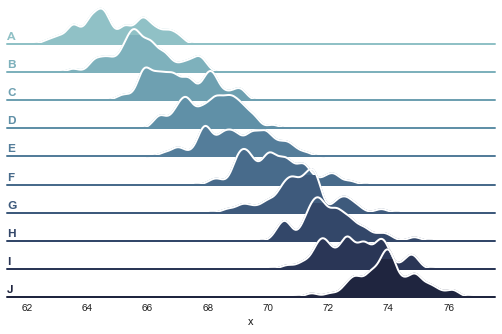

In [29]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

# Probability Experiments

# Code for `P` 

`P` is the traditional name for the Probability function:

In [63]:
from fractions import Fraction

def P(event, space): 
    "The probability of an event, given a sample space of equiprobable outcomes."
    return Fraction(len(event & space), len(space))

Rolling a Die
- Whats the probability of rolling an even number with a single (fair) six-sided die?
- We can define the sample space "D" and the event "even", and compute the probability:

In [64]:
D    = {1, 2, 3, 4, 5, 6}
even = {   2,    4,    6}

die_prob = P(even, D)

In [65]:
print("Fraction: ",die_prob)
print("Decimal: ",die_prob.real.numerator/die_prob.real.denominator)

Fraction:  1/2
Decimal:  0.5


OK, that's reassuring...

# Simulating the Monty Hall Problem

Some people might be more convinced by a simulation than by a probability argument. Here is code for a simulation which goes through this sequence of events:

   1. The host randomly chooses a door for the 'car'
   2. The contestant randomly makes a 'pick' of one of the doors
   3. The host randomly selects a non-car, non-pick door to be 'opened.' 
   4. If strategy == 'switch', contestant changes 'pick' to the other unopened door
   5. Return true if the pick is the door with the car.

In [66]:
import random

def simulate_monty(strategy, doors=(1, 2, 3)):
    "Randomly place car, and given a strategy of 'switch' or 'stick', return True iff the strategy wins."
    car    = random.choice(doors)
    pick   = random.choice(doors)
    opened = random.choice([d for d in doors if d != car and d != pick])
    if strategy == 'switch':
        pick = next(d for d in doors if d != pick and d != opened)
    return (pick == car)

We can confirm that the contestant wins about 2/3 of the time with the switch strategy, and only wins about 1/3 of the time with the stick strategy:

In [71]:
from collections import Counter
# simulate switching after shown goat
Counter(simulate_monty('switch') for _ in range(1000))

Counter({False: 335, True: 665})

In [72]:
# simulate not switching after seeing goat (sticking with original)
Counter(simulate_monty('stick') for _ in range(1000))

Counter({False: 672, True: 328})

In [73]:
#Make a deck of cards:
# A: ace, J: jack, Q: queen, K: king
# C: clubs, D: diamonds, H: hearts, S: spades

def make_deck():
    ranks = ['A', '2', '3', '4', '5', '6', '7',
             '8', '9', '10', 'J', 'Q', 'K']
    suits = ['C', 'D', 'H', 'S']
    deck = []
    for s in suits:
        for r in ranks:
            deck.append(s + r)
    np.random.shuffle(deck)
    return deck

deck = make_deck()

In [81]:
# Draw a card
deck = make_deck()
card = deck[0]
del deck[0]

card = deck.pop(0)  # return and remove element with index 0
print(card)

C8


# Bayes Theorem
Bayes Theorem allows us to go from a sampling (or likelihood) distribution and a prior distribution to a posterior distribution
 
 - What is a Sampling Distribution?
 - A **Sampling Distribution** is the probability of seeing our data (X) given our parameters ($\theta$). This is written as $p(X|\theta)$
 - For example, we might have data on 1,000 coin flips. Where 1 indicates a head. This can be represented in python as:

In [82]:
data_coin_flips = np.random.randint(2, size=1000)
np.mean(data_coin_flips)

0.50800000000000001

A sampling distribution allows us to specify how we think these data were generated. For our coin flips, we can think of our data as being generated from a **Bernoulli Distribution**. This distribution takes one parameter p which is the probability of getting a 1 (or a head for a coin flip). It then returns a value of 1 with probablility p and a value of 0 with probablility (1-p).

a.k.a. the probability distribution of any single experiment that asks a yes–no question, since the question results in a boolean-valued outcome

You can see how this is perfect for a coin flip. With a fair coin we know our p = .5 because we are equally likely to get a 1 (head) or 0 (tail). We can create samples from this distribution like this:

In [83]:
bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
np.mean(bernoulli_flips)

0.499

Now that we have defined how we believe our data were generated, we can calculate the probability of seeing our data given our parameters $p(X|θ)$. Since we have selected a Bernoulli distribution, we only have one parameter: p.

We can use the **Probability Mass Function** (PMF) of the Bernoulli distribution to get our desired probability for a single coin flip. 

The PMF takes a single observed data point and then given the parameters (p in our case) returns the probablility of seeing that data point given those parameters. For a Bernoulli distribution it is simple: if the data point is a 1 the PMF returns p, if the data point is a 0 it returns (1-p). We could write a quick function to do this:

In [40]:
def bern_pmf(x, p):
    if (x == 1):
        return p
    elif (x == 0):
        return 1 - p
    else:
        return "Value Not in Support of Distribution"

We can now use this function to get the probability of a data point give our parameters. You probably see that with p = .5 this function always returns .5

In [41]:
print(bern_pmf(1, .5))
print(bern_pmf(0, .2))

0.5
0.8


This is a pretty simple PMF, but other distributions can get much more complicated. So it is good to know that Scipy has most of these built in. We can draw from the PMF as follows:

In [86]:
import scipy.stats as st
print(st.bernoulli.pmf(1, .5))
print(st.bernoulli.pmf(0, .5))

0.5
0.5


This is nice, but what we really want to know is the probability of see all 1,000 of our data points. How do we do that? The trick here is to assume that our data are **independent and identically distributed**. This assumption allows us to say the probability of seeing all of our data is just the product of each individual probability: $p(x1,…,xn|β)=p(x1|β)∗…∗p(xn|β).$ 

This is actually pretty easy to do:

In [87]:
np.product(st.bernoulli.pmf(data_coin_flips, .5))

9.3326361850321888e-302

In [88]:
#recall
#data_coin_flips

How does that number help us? Well by itself, it doesn’t really help too much. What we need to do now is get more of a distribution for our sampling model. Currently, we have only tested our model with p = .5, but what if p = .8? or .2? What would the probablility of our data look like then? This can be done by defining a grid of values for our p. Below we will make a grid of 100 values between 0 and 1 (because p has to be between 0 and 1) and then we will calculate the probability of seeing our data given each of these values:

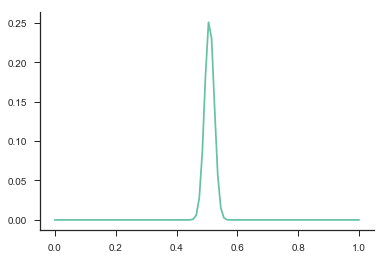

In [89]:
# not sure why this plot isn't working
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
 
params = np.linspace(0, 1, 100)
p_x = [np.product(st.bernoulli.pmf(data_coin_flips, p)) for p in params]
p_x = p_x / np.sum(p_x)
plt.plot(params, np.array(p_x))
sns.despine()

Now we are getting somewhere. We can see that the probablility of seeing our data peaks at p=.5 and almost certainly is between p=.4 and p=.6. Nice. So now we have a good idea of what p value generated our data assuming it was drawn from a Bernoulli distribution. We’re done, right? Not quite…

### Prior Distribution

Bayes Theorem says that we need to think about both our sampling distribution and our prior distribution. 

What do we mean by prior distribution? It is the $p(θ)$ or the probability of seeing a specific value for our parameter. In our sampling distribution we defined 100 values from 0 to 1 for our parameter p. Now we must define the prior probability of seeing each of those values. That is the probability we would have assumed before seeing any data. Most likely, we would have assumed a fair coin, which looks like the distribution above. Lets see how we can do this:

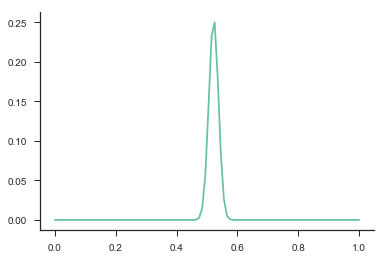

In [90]:
fair_flips = bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
p_fair = np.array([np.product(st.bernoulli.pmf(fair_flips, p)) for p in params])
p_fair = p_fair / np.sum(p_fair)
plt.plot(params, p_fair)
sns.despine()

Basically we created 1,000 fair coin flips and then generated the sampling distribution like we did before (except we divided by the sum of the sampling distribution to make the values sum to 1). Now we have a “fair coin” prior on our parameters. This basically means that before we saw any data we thought coin flips were fair. And we can see that assumption in our prior distribution by the fact that our prior distribution peaks at .5 and is almost all between .4 and .6.

I know what you are thinking – this is pretty boring. The sampling and prior distributions look exactly the same. So lets mix things up. Lets keep our fair prior but change our data to be an unfair coin:

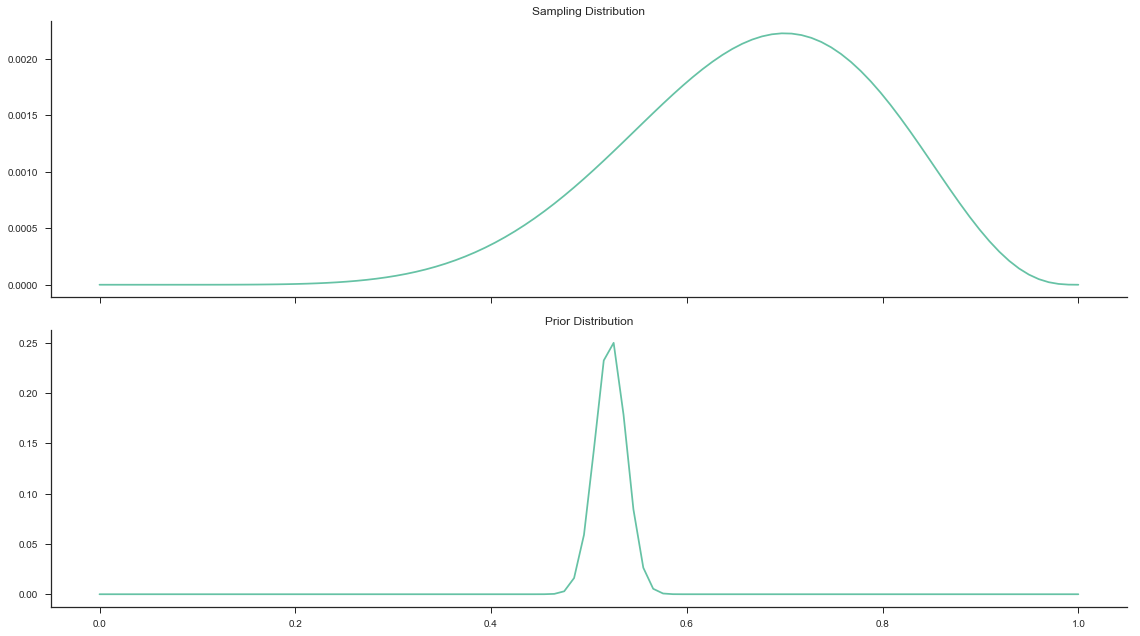

In [91]:
unfair_flips = bernoulli_flips = np.random.binomial(n=1, p=.8, size=10)
p_unfair = np.array([np.product(st.bernoulli.pmf(unfair_flips, p)) for p in params])
fig, axes = plt.subplots(2, 1, sharex=True,figsize=(16,9))
axes[0].plot(params, p_unfair)
axes[0].set_title("Sampling Distribution")
axes[1].plot(params, p_fair)
axes[1].set_title("Prior Distribution")
sns.despine()
plt.tight_layout()

Ah – now this is interesting. We have strong data evidence of an unfair coin (since we generated the data we know it is unfair with p=.8), but our prior beliefs are telling us that coins are fair. How do we deal with this?

# Bayes Theorem (Posterior Distribution

Bayes theorem is what allows us to go from our sampling and prior distributions to our posterior distribution. The posterior distribution is the $P(θ|X)$. Or in English, the probability of our parameters given our data. And if you think about it that is what we really want. We are typically given our data – from maybe a survey or web traffic – and we want to figure out what parameters are most likely given our data. So how do we get to this posterior distribution? Here comes some math (don’t worry it is not too bad):

By definition, we know that (If you don’t believe me, check out this page for a refresher):

$P(A|B) = \dfrac{P(A,B)}{P(B)}$ Or in English, the probability of seeing A given B is the probability of seeing them both divided by the probability of B.
$P(B|A) = \dfrac{P(A,B)}{P(A)}$ Or in English, the probability of seeing B given A is the probability of seeing them both divided by the probability of A.


You will notice that both of these values share the same numerator, so:

$P(A,B) = P(A|B)*P(B)$
$P(A,B) = P(A|B)*P(B)$
Thus:

$P(A|B)*P(B) = P(B|A)*P(A)$

Which implies:

$P(A|B) = \dfrac{P(B|A)*P(A)}{P(B)}$

And plug in $θ$ for $A$ and $X$ for $B$:

$P(\theta|X) = \dfrac{P(X|\theta)*P(\theta)}{P(X)}$

Nice! Now we can plug in some terminology we know:

$Posterior = \dfrac{likelihood * prior}{P(X)}$

But what is the $P(X)?$ Or in English, the probability of our data? That sounds weird… Let’s go back to some math and use B and A again:

We know that $P(B)=∑AP(A,B)$ (check out this page for a refresher)

And from our definitions above, we know that:

$P(A,B) = P(A|B)*P(A)$

Thus:

$P(B) = \sum_{A} P(A|B)*P(A)$

Plug in our $θ$ and $X$:

$P(X) = \sum_{\theta} P(\theta|X)*P(\theta)$

Plug in our terminology:

$P(X) = \sum_{\theta} likelihood * prior$

Wow! Isn’t that awesome! But what do we mean by $∑θ$. This means to sum over all the values of our parameters. In our coin flip example, we defined 100 values for our parameter p, so we would have to calculated the likelihood * prior for each of these values and sum all those anwers. That is our denominator for Bayes Theorem. Thus our final answer for Bayes is:

$Posterior = \dfrac{likelihood * prior}{\sum_{\theta} likelihood * prior}$

That was a lot of text. Let’s do some more coding and put everything together.

In [101]:
def bern_post(n_params=100, n_sample=10000, true_p=.8, prior_p=.5, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    return posterior

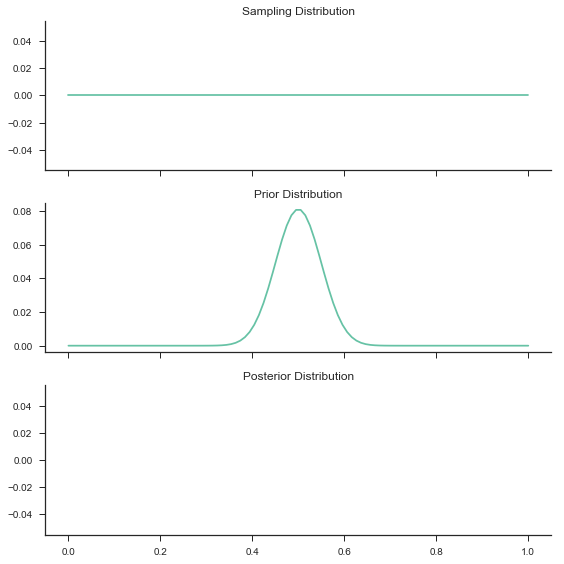

In [102]:
awesomely_instantiated_plot = bern_post()

You will notice that I set 100 as the number of observations for the prior and likelihood. This increases the variance of our distributions. More data typically decreases the spread of a distribution. Also, as you get more data to estimate your likelihood, the prior distribution matters less.

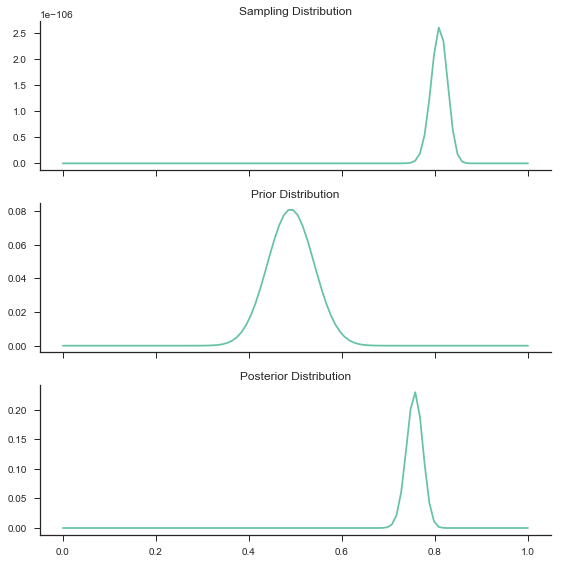

In [135]:
awesomly_instantiated_plot_w_more_flips = bern_post(n_sample=500)